In [2]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [25]:
sys.path.insert(0, '../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2
import gaussianprocessregression as gpr
import designofexperiment as doe
#import pycbcwaveform as pycbcwave
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics
import window

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(taylorf2)
imp.reload(gpr)
imp.reload(doe)
#imp.reload(pycbcwave)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)
imp.reload(window)

import constants
imp.reload(constants)
from constants import *

In [26]:
from lalwaveform import dimensionless_td_waveform, dimensionless_fd_waveform
import pycbc.waveform

# TaylorF2 waveform

In [36]:
q, s1, s2, lambda1, lambda2 = 0.5, 0.2, -0.6, 1000.0, 2000.0
mf_min = 0.0002
mf_max = 3.0*MF_ISCO
delta_mf = 1.0e-8
h_lal = lalwaveform.dimensionless_fd_waveform(
    approximant='TaylorF2', 
    q=q, spin1z=s1, spin2z=s2, 
    lambda1=lambda1, lambda2=lambda2, 
    mf_min=mf_min, mf_max=mf_max, delta_mf=delta_mf)

h_lal.add_phase(remove_start_phase=True)

In [37]:
mf = h_lal.x

h_ben = taylorf2.dimensionless_taylorf2_waveform(
    mf=mf, q=q,
    spin1z=s1, spin2z=s2,
    lambda1=lambda1, lambda2=lambda2)
h_ben.add_phase(remove_start_phase=True)

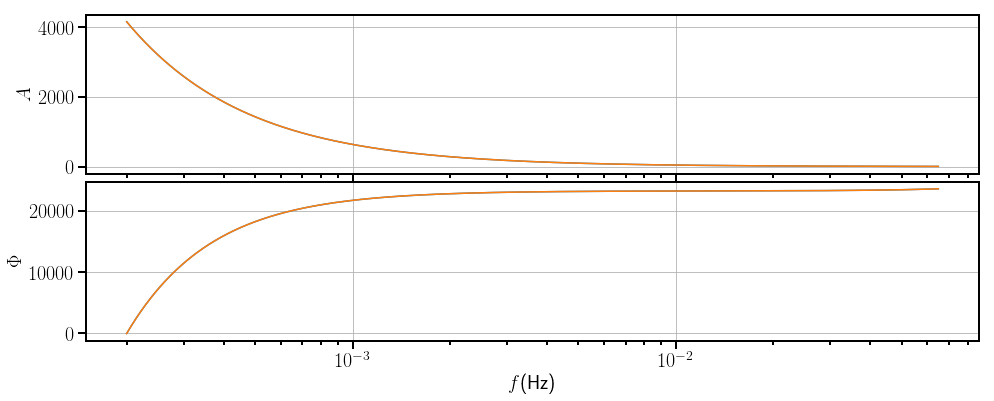

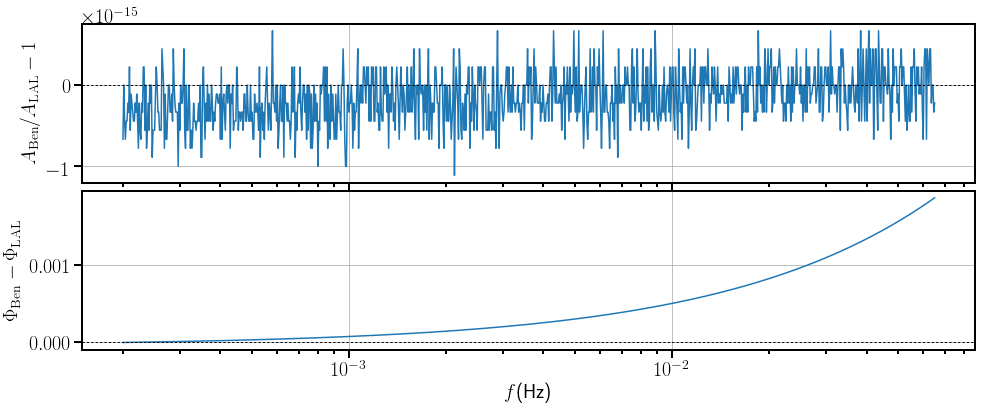

In [38]:
# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_ben, h_lal])
#ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$f$(Hz)')
ax1.grid()
ax2.grid()

# Plot error
fig, (ax1, ax2) = wave.plot_waveform_difference_fd(h_ben, h_lal)
ax1.set_ylabel(r'$A_{\rm Ben}/A_{\rm LAL} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm Ben} - \Phi_{\rm LAL}$')
ax2.set_xlabel(r'$f$(Hz)')
ax1.grid()
ax2.grid()